<a href="https://colab.research.google.com/github/SyedHabib14/Sign-Detection-using-ResNet50/blob/main/Syed_Habeeb_Haider_%7C_Fingers_Detection_using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

>  Using Computer Vision, I've given myself a task to detect finger signs using Deep Learning.

###**Problem Statement**:
To detect Finger Signs

### **Task type**:
*Image Classification*

### **Algorithm**:
 Convolutional Neural Network **ResNet50** (CNN)

In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import h5py
import math
from keras import layers
import scipy.misc
import matplotlib.pyplot as plt

from scipy.stats import zscore

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense, Activation
# Imported initially required libraries.

In [ ]:
import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(0)

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!git clone https://github.com/SyedHabib14/Sign-Detection-using-ResNet50.git

fatal: destination path 'Sign-Detection-using-ResNet50' already exists and is not an empty directory.


In [ ]:
!wget -O Signs_Data_Training.h5 https://github.com/SyedHabib14/Sign-Detection-using-ResNet50/raw/main/Signs_Data_Training.h5

--2023-12-09 11:08:00--  https://github.com/SyedHabib14/Sign-Detection-using-ResNet50/raw/main/Signs_Data_Training.h5
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SyedHabib14/Sign-Detection-using-ResNet50/main/Signs_Data_Training.h5 [following]
--2023-12-09 11:08:00--  https://raw.githubusercontent.com/SyedHabib14/Sign-Detection-using-ResNet50/main/Signs_Data_Training.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13281872 (13M) [application/octet-stream]
Saving to: ‘Signs_Data_Training.h5’

Signs_Data_Training 100%[===================>]  12.67M  --.-KB/s    in 0.1s    

2023-12-09 11:08:

In [ ]:
!wget -O Signs_Data_Testing.h5 https://github.com/SyedHabib14/Sign-Detection-using-ResNet50/raw/main/Signs_Data_Testing.h5

--2023-12-09 11:08:01--  https://github.com/SyedHabib14/Sign-Detection-using-ResNet50/raw/main/Signs_Data_Testing.h5
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SyedHabib14/Sign-Detection-using-ResNet50/main/Signs_Data_Testing.h5 [following]
--2023-12-09 11:08:01--  https://raw.githubusercontent.com/SyedHabib14/Sign-Detection-using-ResNet50/main/Signs_Data_Testing.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477712 (1.4M) [application/octet-stream]
Saving to: ‘Signs_Data_Testing.h5’

Signs_Data_Testing. 100%[===================>]   1.41M  --.-KB/s    in 0.08s   

2023-12-09 11:08:01 (

In [ ]:
train_data = h5py.File('/content/Signs_Data_Training.h5')
test_data = h5py.File('/content/Signs_Data_Testing.h5')

In [ ]:
train_data.keys(), test_data.keys()

(<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>,
 <KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>)

In [ ]:
X_train = train_data['train_set_x']
Y_train = train_data['train_set_y']
X_test = test_data['test_set_x']
Y_test = test_data['test_set_y']

In [ ]:
print ("Number of training examples = " + str(X_train.shape[0]))
print ("Number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_train shape: " + str(Y_train.shape[0]))
print ("Y_test shape: " + str(Y_test.shape[0]))

Number of training examples = 1080
Number of test examples = 120
X_train shape: (1080, 64, 64, 3)
X_test shape: (120, 64, 64, 3)
Y_train shape: 1080
Y_test shape: 120


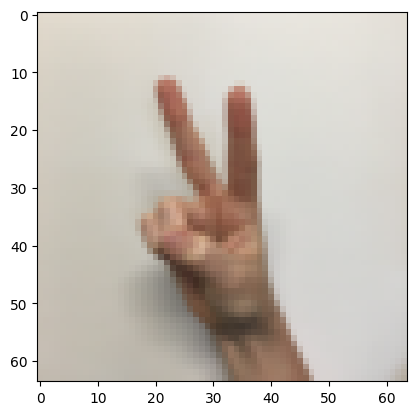

In [ ]:
file_path = '/content/Signs_Data_Training.h5'
with h5py.File(file_path, 'r') as file:
    # Accessing the dataset containing image data
    image_dataset = file['train_set_x']

    # Extracting a sample image (assuming dataset dimensions are (num_images, height, width, channels))
    sample_image = image_dataset[999]

    # Displaying the image using matplotlib
    plt.imshow(sample_image)
    plt.show()

In [ ]:
# Changing it to numpy array
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
X_train = X_train.reshape(1080, -1)
X_train = pd.DataFrame(X_train)

X_test = X_test.reshape(120, -1)
X_test = pd.DataFrame(X_test)

Y_train = pd.DataFrame(Y_train)

Y_test = pd.DataFrame(Y_test)

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,227,220,214,227,221,215,227,222,215,227,...,210,209,210,210,209,210,209,208,209,209
1,238,232,223,238,232,223,238,232,223,237,...,193,214,203,194,215,203,194,215,204,192
2,228,220,208,228,220,208,227,219,208,227,...,198,208,204,200,210,206,201,211,207,202
3,228,219,208,229,219,208,228,220,208,227,...,193,199,194,194,200,195,193,201,196,193
4,225,217,204,225,218,205,225,218,206,225,...,203,205,202,201,202,199,198,199,195,192


In [ ]:
# Check if pixel values are in the range between 0 and 255
out_of_range_found = False

for i in range(X_train.shape[1]):
    for j in range(X_train.shape[0]):
        if X_train[i][j]>255:
            print("Error at i= " +str(i) + " and j= " + str(j))
            out_of_range_found = True

if not out_of_range_found:
    print("Everything is preprocessed neat and fine!")

Everything is preprocessed neat and fine!


In [ ]:
Y_train.columns = ['Label']
Y_test.columns = ['Label']

<Axes: ylabel='count'>

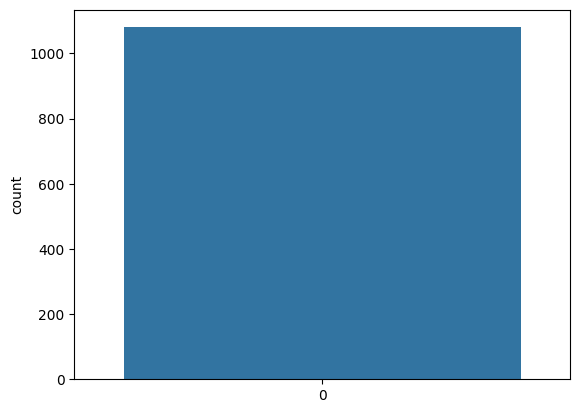

In [ ]:
# Countplot of labels to see if the data is imbalanced
sns.countplot(Y_train['Label'])

In [ ]:
Y_train.Label.value_counts()

5    180
0    180
2    180
4    180
1    180
3    180
Name: Label, dtype: int64

In [ ]:
Y_test.Label.value_counts()

0    20
5    20
1    20
3    20
4    20
2    20
Name: Label, dtype: int64

# **Scaling the Data![image_2023-12-09_155317962.png](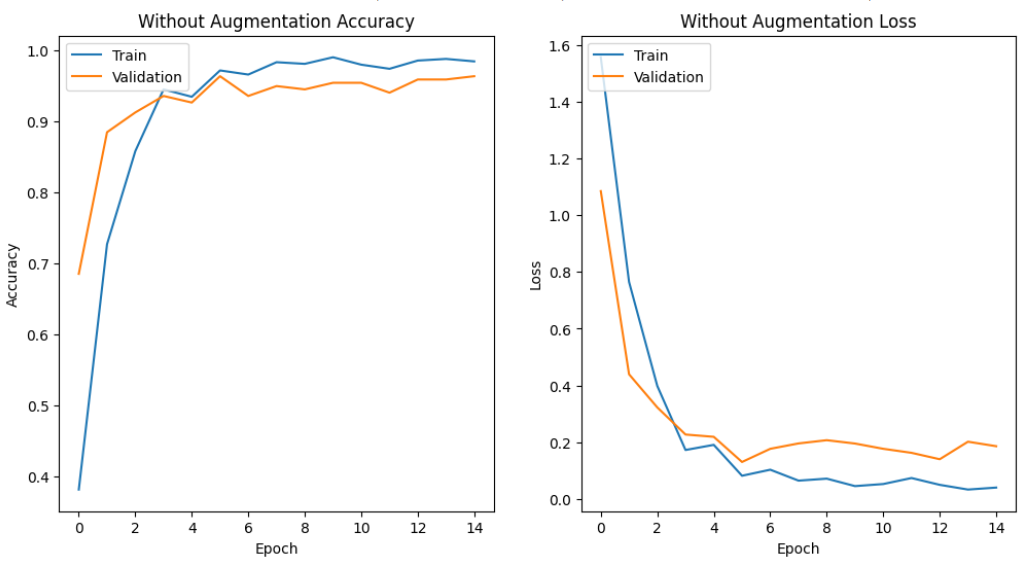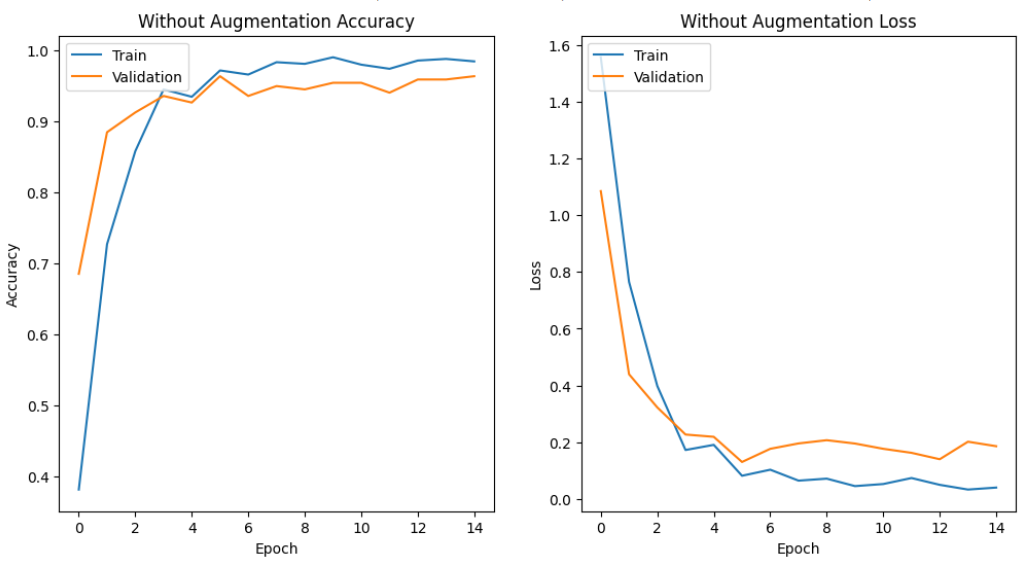)**

In [ ]:
X_train_norm = zscore(X_train)
X_train_norm = X_train_norm.values.reshape(1080, 64, 64, 3)

X_test_norm = zscore(X_test)
X_test_norm = X_test_norm.values.reshape(120, 64, 64, 3)

In [ ]:
print(X_train_norm.shape)
print(X_test_norm.shape)

(1080, 64, 64, 3)
(120, 64, 64, 3)


# **Let's do One-Hot Label Encoding of our test data now**

In [ ]:
Y_train_norm = pd.get_dummies(Y_train['Label'])
Y_test_norm = pd.get_dummies(Y_test['Label'])

In [ ]:
print(Y_train_norm.shape)
print(Y_test_norm.shape)

(1080, 6)
(120, 6)


# **Developing a CNN Model**

In [ ]:
def create_model(input_shape, learning_rate=0.001):

    X_input = Input(input_shape)

    # Layer1
    X = Conv2D(32, (5,5), strides=(1,1), padding = 'same', activation='relu', name='Conv1')(X_input)
    X = MaxPool2D((2,2), name = 'Pool1')(X)
    X = Dropout(0.25)(X)

    # Layer2
    X = Conv2D(64, (5,5), strides=(1,1), padding = 'same', activation='relu', name='Conv2')(X)
    X = MaxPool2D((2,2), name = 'Pool2')(X)
    X = Dropout(0.25)(X)

    X = Flatten()(X)

    # Fullly Connected
    X = Dense(256, activation = 'relu', name='fc1')(X)
    X = Dropout(0.25)(X)

    X = Dense(120, activation = 'relu', name='fc2')(X)
    X = Dropout(0.25)(X)

    # Softmax Output Layer
    X = Dense(6, activation = 'softmax', name='Output')(X)

    model = Model(inputs = X_input, outputs = X)

    # Compile the model
    model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
M1 = create_model(X_train_norm.shape[1:])

In [ ]:
M1.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early = EarlyStopping(
    monitor = "accuracy",
    min_delta = 0.001,
    patience = 5,
    verbose = True,
    mode = "auto",
    restore_best_weights = True)

In [ ]:
M1.fit(X_train_norm, Y_train_norm, epochs = 25, callbacks = early)

Epoch 1/25
34/34 [==============================] - 23s 604ms/step - loss: 1.4885 - accuracy: 0.3926
Epoch 2/25
34/34 [==============================] - 22s 642ms/step - loss: 0.9354 - accuracy: 0.6583
Epoch 3/25
34/34 [==============================] - 16s 479ms/step - loss: 0.6678 - accuracy: 0.7630
Epoch 4/25
34/34 [==============================] - 17s 481ms/step - loss: 0.4937 - accuracy: 0.8213
Epoch 5/25
34/34 [==============================] - 16s 476ms/step - loss: 0.4539 - accuracy: 0.8370
Epoch 6/25
34/34 [==============================] - 17s 498ms/step - loss: 0.3304 - accuracy: 0.8815
Epoch 7/25
34/34 [==============================] - 16s 469ms/step - loss: 0.2719 - accuracy: 0.9111
Epoch 8/25
34/34 [==============================] - 17s 512ms/step - loss: 0.2276 - accuracy: 0.9296
Epoch 9/25
34/34 [==============================] - 16s 475ms/step - loss: 0.1973 - accuracy: 0.9370
Epoch 10/25
34/34 [==============================] - 16s 465ms/step - loss: 0.1573 - accura

In [ ]:
M1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 Conv1 (Conv2D)              (None, 64, 64, 32)        2432      
                                                                 
 Pool1 (MaxPooling2D)        (None, 32, 32, 32)        0         
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 Conv2 (Conv2D)              (None, 32, 32, 64)        51264     
                                                                 
 Pool2 (MaxPooling2D)        (None, 16, 16, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0     

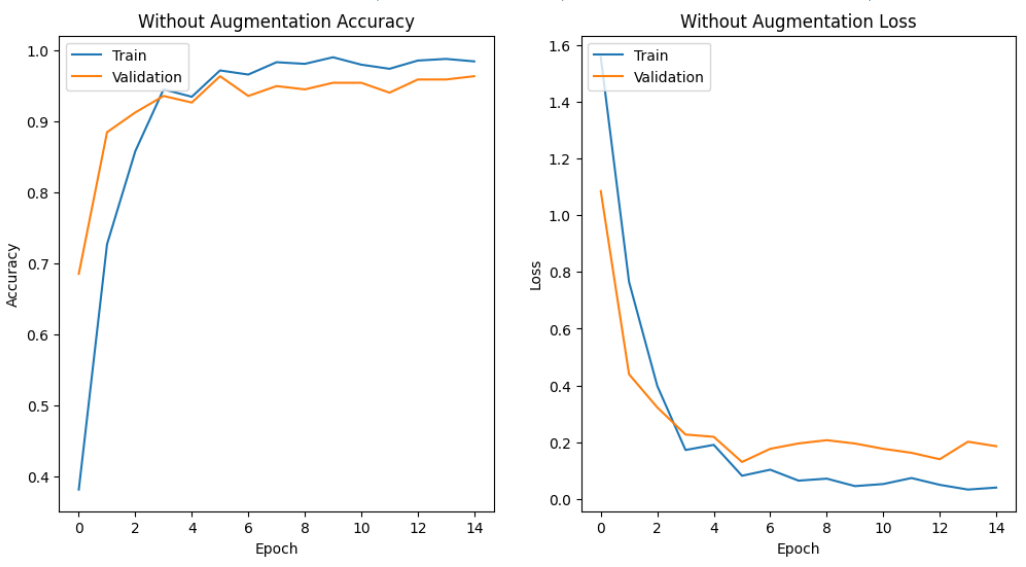

In [ ]:
params = {'epochs': [5, 10, 15, 20, 25], 'batch_size': [16, 32, 64, 128]}

grid_search = GridSearchCV(estimator = M1, param_grid = params, cv=2, n_jobs = -1, scoring='accuracy')

In [ ]:
grid_search

GridSearchCV(cv=2,
             estimator=<keras.src.engine.functional.Functional object at 0x7dc02172fbe0>,
             n_jobs=-1,
             param_grid={'batch_size': [16, 32, 64, 128],
                         'epochs': [5, 10, 15, 20, 25]},
             scoring='accuracy')

In [ ]:
grid_search.fit(X_train_norm, Y_train_norm)

TypeError: ignored

##**Time to Predict on Test Data and Evaluate our CNN Classifier's performance!** ⚡

In [ ]:
K.set_learning_phase(1)

In [ ]:
# Training Accuracy
Y_train_hat = M1.predict(X_train_norm)
Y_train_hat = np.argmax(Y_train_hat, axis = 1)

print(accuracy_score(Y_train, Y_train_hat))

34/34 [==============================] - 4s 105ms/step
1.0


In [ ]:
# Testing Accuracy
Y_hat = M1.predict(X_test_norm)
Y_hat = np.argmax(Y_hat, axis = 1)

print(accuracy_score(Y_test, Y_hat))

4/4 [==============================] - 0s 97ms/step
0.9666666666666667


In [ ]:
preds = M1.evaluate(X_test_norm, Y_test_norm, batch_size=32, verbose=1, sample_weight=None)

4/4 [==============================] - 1s 143ms/step - loss: 0.1227 - accuracy: 0.9667


In [ ]:
checklist = Y_test_norm.iloc[99]
print(checklist)

0    0
1    0
2    1
3    0
4    0
5    0
Name: 99, dtype: uint8


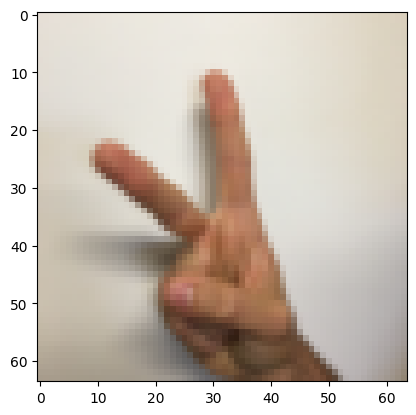

In [ ]:
file_path = '/content/Signs_Data_Testing.h5'
with h5py.File(file_path, 'r') as file:
    # Access the dataset containing image data
    image_dataset = file['test_set_x']

    # Extract a sample image (assuming dataset dimensions are (num_images, height, width, channels))
    sample_image = image_dataset[99]
    x = sample_image
    # Display the image using matplotlib
    plt.imshow(sample_image)
    plt.savefig('check.png')
    plt.show()

In [ ]:
!nvidia-smi
# Getting an idea about host GPU

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# Save the entire model, including architecture, optimizer config, and weights
M1.save('myFingerDectector.keras')
M1.save_weights('myWeights.keras')

In [ ]:
from keras.models import load_model
model2 = load_model('/content/myFingerDectector.keras')

In [ ]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

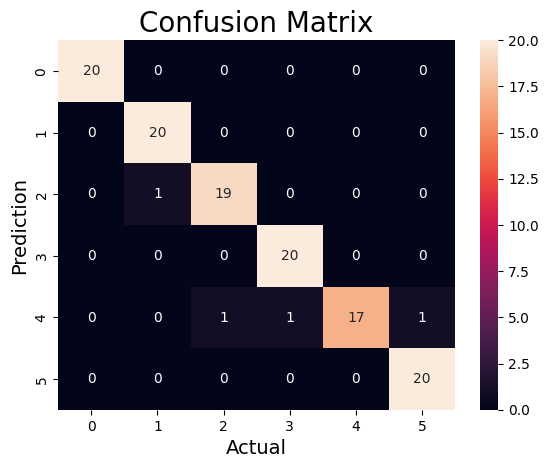

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
cm = confusion_matrix(Y_test, Y_hat)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0','1','2','3','4','5'],
            yticklabels=['0','1','2','3','4','5'])
plt.ylabel('Prediction',fontsize=14)
plt.xlabel('Actual',fontsize=14)
plt.title('Confusion Matrix',fontsize=20)
plt.show()

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_hat)

# Calculate precision
precision = precision_score(Y_test, Y_hat,  average='weighted')

# Calculate recall
recall = recall_score(Y_test, Y_hat, average='weighted')

# Calculate F1 score
f1 = f1_score(Y_test, Y_hat, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy.round(4))
print("Precision:", precision.round(4))
print("Recall:", recall.round(4))
print("F1 Score:", f1.round(4))

Accuracy: 0.9667
Precision: 0.9679
Recall: 0.9667
F1 Score: 0.966


Epoch 1/25
27/27 [==============================] - 17s 570ms/step - loss: 1.8234 - accuracy: 0.2095 - val_loss: 1.7287 - val_accuracy: 0.3241
Epoch 2/25
27/27 [==============================] - 15s 559ms/step - loss: 1.6710 - accuracy: 0.3009 - val_loss: 1.3057 - val_accuracy: 0.6157
Epoch 3/25
27/27 [==============================] - 15s 569ms/step - loss: 1.4968 - accuracy: 0.3808 - val_loss: 0.9467 - val_accuracy: 0.6944
Epoch 4/25
27/27 [==============================] - 15s 566ms/step - loss: 1.3183 - accuracy: 0.4861 - val_loss: 0.8797 - val_accuracy: 0.6852
Epoch 5/25
27/27 [==============================] - 15s 567ms/step - loss: 1.2141 - accuracy: 0.5000 - val_loss: 0.7278 - val_accuracy: 0.7407
Epoch 6/25
27/27 [==============================] - 14s 522ms/step - loss: 1.1895 - accuracy: 0.5359 - val_loss: 0.7665 - val_accuracy: 0.7222
Epoch 7/25
27/27 [==============================] - 15s 530ms/step - loss: 1.1092 - accuracy: 0.5498 - val_loss: 0.6456 - val_accuracy: 0.7685

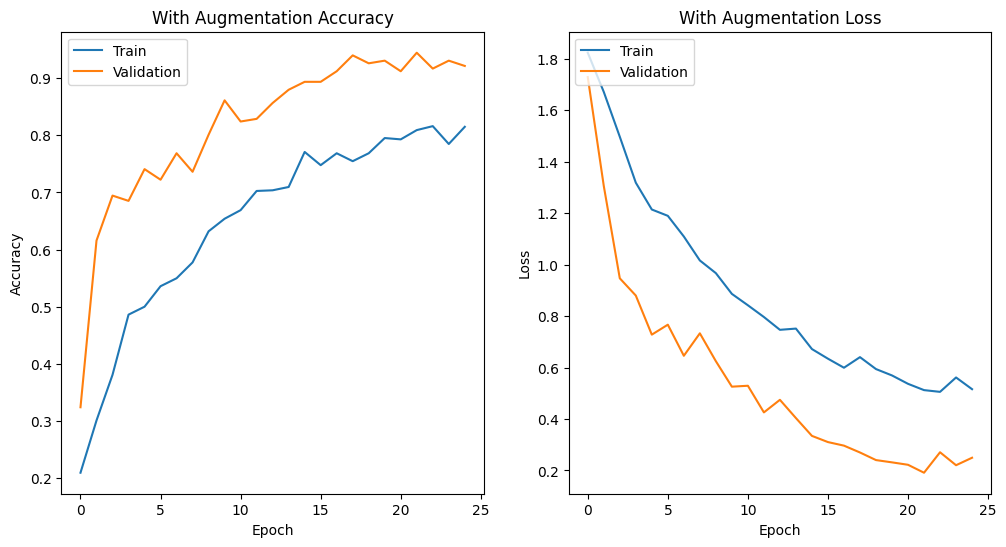

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

X_train_norm, X_val_norm, Y_train_norm, Y_val_norm = train_test_split(X_train_norm, Y_train_norm, test_size=0.2, random_state=42)

# Define the CNN model
M2 = create_model(X_train_norm.shape[1:])

# Compile the model
M2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# With Image Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

history_with_augmentation = M2.fit(datagen.flow(X_train_norm, Y_train_norm, batch_size=32), epochs=25, validation_data=(X_val_norm, Y_val_norm), callbacks=[early])

# Plotting the results

def plot_history(history, title):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Plot with augmentation
plot_history(history_with_augmentation, 'With Augmentation')


In [ ]:
from scikeras.wrappers import KerasClassifier
M3 = KerasClassifier(build_fn =  create_model(X_train_norm.shape[1:]))

In [ ]:
params = {'epochs': [5, 10, 15, 20, 25], 'batch_size': [16, 32, 64, 128]}

grid_search = GridSearchCV(estimator = M3, param_grid = params, cv=2, n_jobs = -1, scoring='accuracy')

In [ ]:
grid_search

GridSearchCV(cv=2,
             estimator=KerasClassifier(build_fn=<keras.src.engine.functional.Functional object at 0x7dc01eb46a40>),
             n_jobs=-1,
             param_grid={'batch_size': [16, 32, 64, 128],
                         'epochs': [5, 10, 15, 20, 25]},
             scoring='accuracy')

In [ ]:
grid_search.fit(X_train_norm, Y_train_norm, verbose = True)

Epoch 1/20
27/27 [==============================] - 13s 453ms/step - loss: 1.7215 - accuracy: 0.3438
Epoch 2/20
27/27 [==============================] - 12s 449ms/step - loss: 0.9135 - accuracy: 0.6551
Epoch 3/20
27/27 [==============================] - 12s 452ms/step - loss: 0.5527 - accuracy: 0.8021
Epoch 4/20
27/27 [==============================] - 12s 439ms/step - loss: 0.3239 - accuracy: 0.8854
Epoch 5/20
27/27 [==============================] - 11s 400ms/step - loss: 0.1995 - accuracy: 0.9352
Epoch 6/20
27/27 [==============================] - 12s 439ms/step - loss: 0.1509 - accuracy: 0.9525
Epoch 7/20
27/27 [==============================] - 12s 450ms/step - loss: 0.1172 - accuracy: 0.9653
Epoch 8/20
27/27 [==============================] - 12s 452ms/step - loss: 0.0940 - accuracy: 0.9688
Epoch 9/20
27/27 [==============================] - 12s 451ms/step - loss: 0.0618 - accuracy: 0.9769
Epoch 10/20
27/27 [==============================] - 12s 451ms/step - loss: 0.0398 - accura

GridSearchCV(cv=2,
             estimator=KerasClassifier(build_fn=<keras.src.engine.functional.Functional object at 0x7dc01eb46a40>),
             n_jobs=-1,
             param_grid={'batch_size': [16, 32, 64, 128],
                         'epochs': [5, 10, 15, 20, 25]},
             scoring='accuracy')